In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker


# 2 Loading and Selecting Data

In [13]:

df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
countries = ['Canada', 'Germany', 'United Kingdom', 'US', 'France', 'India']


df = df[df['Country'].isin(countries)]





# Section 3 - We create a summary column that aggregates the total number of cases across our confirmed cases, recovered cases, and any individuals who have died as a result of COVID-19



In [14]:
df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Cases
32,2020-01-22,Canada,0,0,0,0
62,2020-01-22,France,0,0,0,0
66,2020-01-22,Germany,0,0,0,0
79,2020-01-22,India,0,0,0,0
174,2020-01-22,US,1,0,0,1


# Section 4 - Restructuring our Data    

In [15]:
df = df.pivot(index='Date', columns='Country', values='Cases')
countries = list(df.columns)
#covid = df.reset_index('Date')
df.columns = countries




# Section 5 - Calculating Rates per 100,000

In [16]:

populations = {'Canada':37664517, 'Germany': 83721496 , 'United Kingdom': 67802690 , 'US': 330548815, 'France': 65239883, 'India':1438027228}
percapita = df.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*100000  

# Section 6 - Generating Colours and Style

In [17]:

colors = {'Canada':'#045275', 'India':'#089099', 'France':'#7CCBA2', 'Germany':'#FCDE9C', 'US':'#DC3977', 'United Kingdom':'#7C1D6F'}
plt.style.use('fivethirtyeight')



# Section 7 - Creating the Visualization

In [18]:

plot = df.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('# of Cases')

Text(0,0.5,'# of Cases')

# Section 8 - Assigning Colour

In [19]:

for country in list(colors.keys()):
    plot.text(x = df.index[-1], y = df[country].max(), color = colors[country], s = country, weight = 'bold')

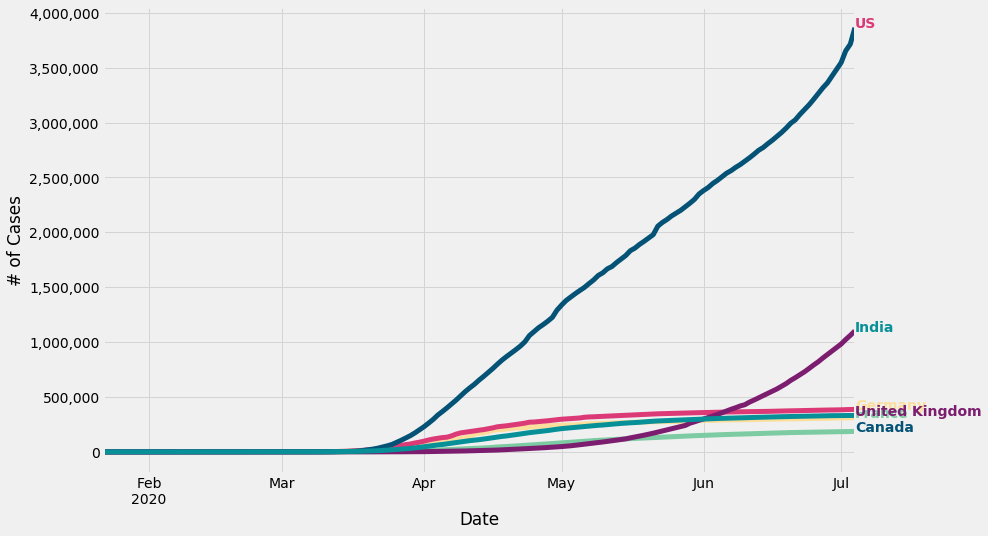

In [121]:
plt.show()